In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df1=pd.read_csv('xdata.csv')
df2=pd.read_csv('ydata.csv')

In [13]:
X=df1.values
Y=df2.values
print(X.shape)
print(Y.shape)
#print(X)
#print(Y)
# removing first columns
X=X[:,1:]
Y=Y[:,1:]
print(X.shape)
print(Y.shape) # but still it's a 2-d array
Y.reshape((399,))
print(Y.shape)

(399, 3)
(399, 2)
(399, 2)
(399, 1)
(399, 1)


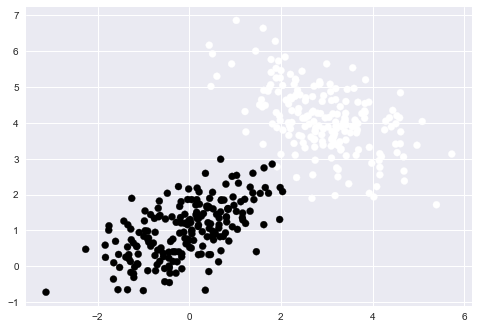

In [17]:

plt.scatter(X[:,0],X[:,1],c=Y) # in scatter parameters are features like here is -> 0th column and 1st column
plt.show()# Y [index] represent the class of X[column][index] th data

In [16]:
plt.style.use('seaborn')

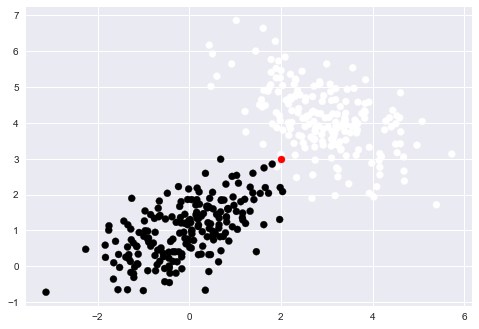

In [18]:
query_x = np.array([2,3])
plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(query_x[0],query_x[1],color='red')
plt.show()

In [19]:
def dist(x1,x2):# x1 ,x2 are vector or array but of same data type
    return np.sqrt(sum((x1-x2)**2))

In [44]:
import warnings
warnings.filterwarnings('ignore')
# Knn algo implementation
def knn(X,Y,query_x,k=5):
    m=X.shape[0]# total point are m
    vals=[]# empty list which contains tuples (dist,label)
    for i in range(m):#arrays are 0-indexed
        d=dist(X[i],query_x)
        vals.append((d,Y[i]))# (a,b)-> a tuple
    vals=sorted(vals)
    # one brute force way to traverse the vals and coumnt the no of 0's and 1's
    # another way s given below
    # convert it to 2-d array
    # but first slice this list
    # first K-nearest neighbours
    vals=vals[:k]
    vals=np.array(vals) # don't  use [] to create an array bcox vals already contains []
    print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)# we only care about labels columns and unique provide an array 
    # of elements and their counts
    # NOTE:np.unique(array-like) return array of arrays in which 1st array contains unique element in sorted manner
    # and 2nd array contains frequencies correponding to that first array elements
    
    # 1st columns(0-inedxed) of new_val contain the count of 0,1 in soerted elements
    index = new_vals[1].argmax()# returns the index
    # new_vals[1]-> ferquency array and np.argmax(np_array) return the index of max element in np_array
    pred = new_vals[0][index]
    
    return pred[0] # or return pred
    #print(new_vals)
        
    


In [46]:
class_no=knn(X,Y,query_x,5)
print(class_no)
print(type(class_no))


[[0.11937694641032923 array([0.])]
 [0.2439279914285809 array([1.])]
 [0.24435617231406334 array([0.])]
 [0.32750157532483193 array([0.])]
 [0.44941873737939525 array([1.])]]
0.0
<class 'numpy.float64'>
